In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


- Use IQR range rule and upper and lower bounds to identify the lower outliers of each column for csv, using multiplier of 1.5

In [4]:
# Convert to datetime for ease of use
df.Date = pd.to_datetime(df.Date)

In [6]:
df = df.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [7]:
# Creation of month column for aggregate analysis
df['Month'] = df.index.month_name()

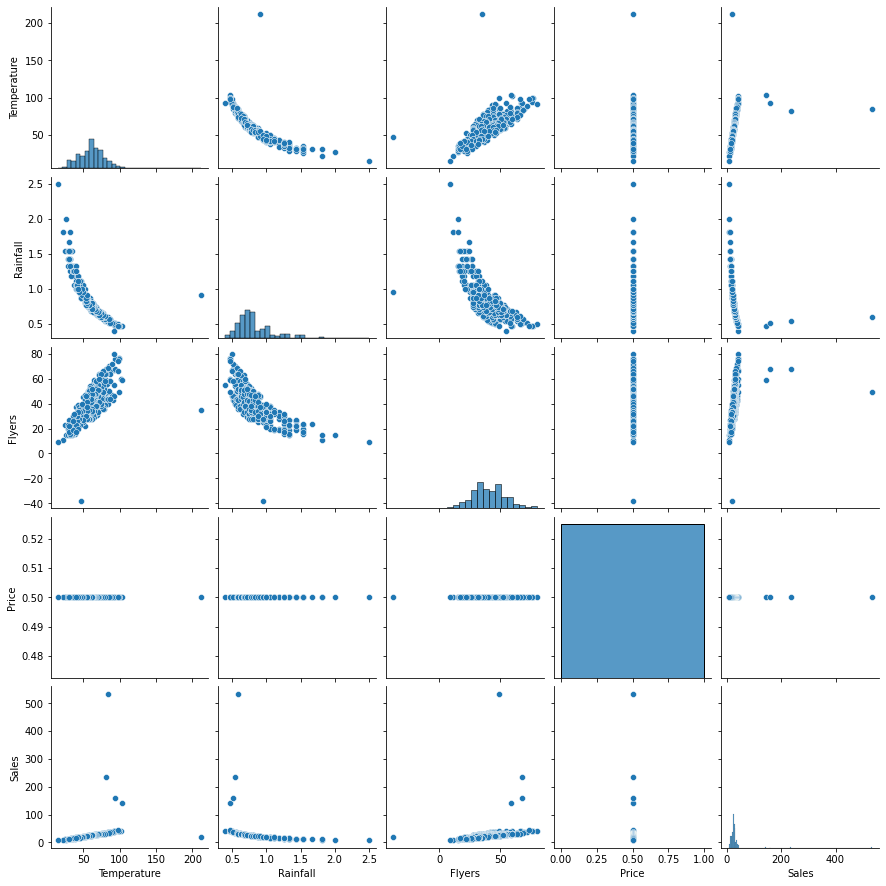

In [8]:
sns.pairplot(df)

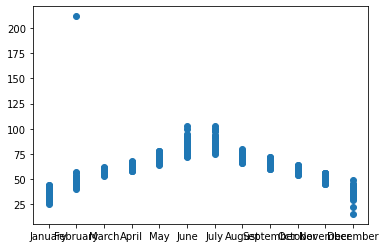

In [10]:
plt.scatter(df.Month, df.Temperature)

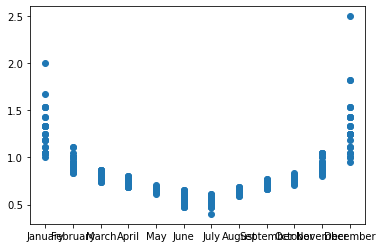

In [11]:
plt.scatter(df.Month, df.Rainfall)

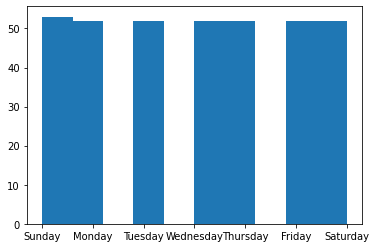

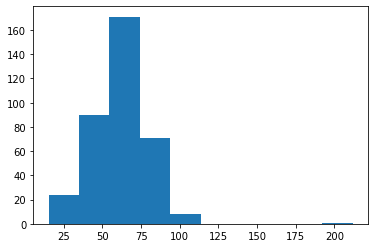

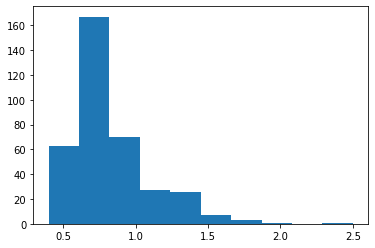

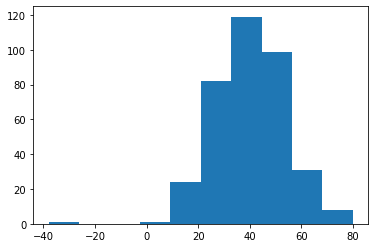

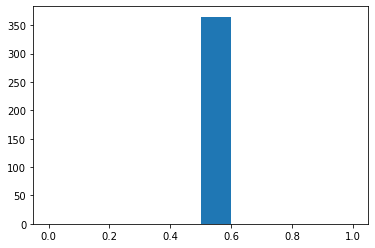

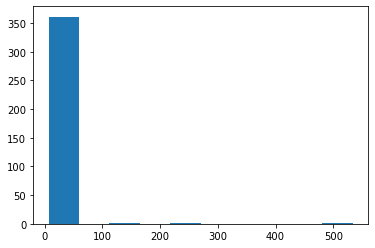

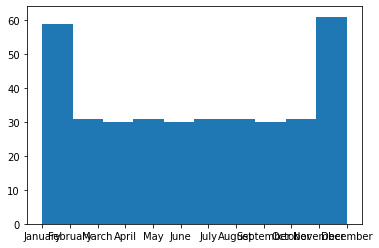

In [13]:
# Continued visualizations
for col in df.columns:
    plt.hist(df[col])
    plt.show()

In [54]:
# Getting our lower and upper bounds
def lower_and_upper(col, mult):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    lower = q1 - mult * iqr
    upper = q3 + mult * iqr
    return lower, upper

In [55]:
lower, upper = lower_and_upper(df.Rainfall, 1.5)

In [56]:
lower, upper

(0.26, 1.3)

In [57]:
df[(df['Rainfall'] < lower) | (df['Rainfall'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


In [58]:
lower, upper = lower_and_upper(df.Temperature, 1.5)

In [59]:
df[(df['Temperature'] < lower) | (df['Temperature'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [60]:
lower, upper = lower_and_upper(df.Flyers, 1.5)

In [61]:
df[(df['Flyers'] < lower) | (df['Flyers'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [62]:
lower, upper = lower_and_upper(df.Price, 1.5)

In [63]:
df[(df['Price'] < lower) | (df['Price'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


In [64]:
lower, upper = lower_and_upper(df.Sales, 1.5)

In [65]:
df[(df['Sales'] < lower) | (df['Sales'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [37]:
# Using multiplier of 3 as well

In [71]:
lower, upper = lower_and_upper(df.Temperature, 3)

In [72]:
df[(df['Temperature'] < lower) | (df['Temperature'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


In [73]:
lower, upper = lower_and_upper(df.Rainfall, 3)

In [74]:
df[(df['Rainfall'] < lower) | (df['Rainfall'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [75]:
lower, upper = lower_and_upper(df.Flyers, 3)

In [76]:
df[(df['Flyers'] < lower) | (df['Flyers'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


In [77]:
lower, upper = lower_and_upper(df.Price, 3)

In [78]:
df[(df['Price'] < lower) | (df['Price'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,


In [79]:
lower, upper = lower_and_upper(df.Sales, 3)

In [80]:
df[(df['Sales'] < lower) | (df['Sales'] > upper)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


There are a number of outliers that can be explained by the other data around them, as in they seem like real data and not an error, but some are either error or necessary to remove for a better sense of a 'normal' occurrence for the dataset. 

2. Identify if columns are normally distributed
- Use a 2 sigma decision rule to isolate outliers
3. Use a 3 sigma decision rule to isolate outliers

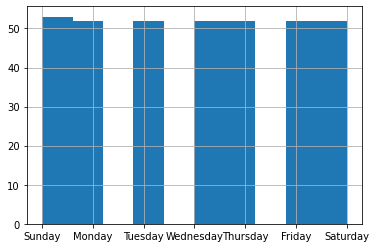

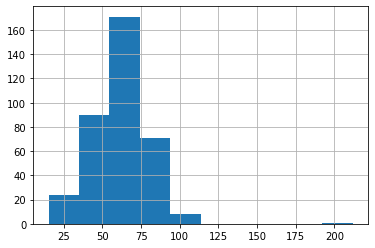

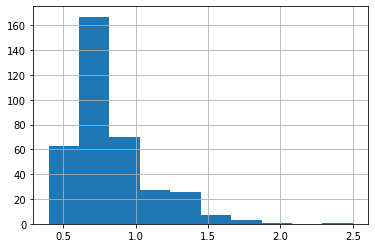

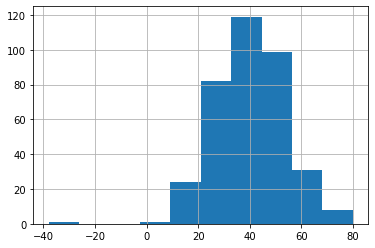

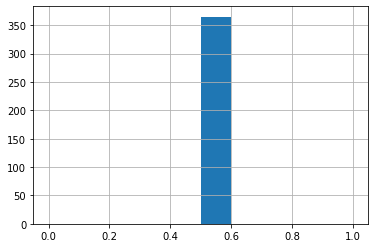

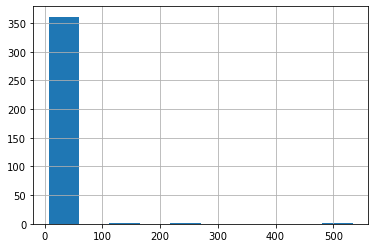

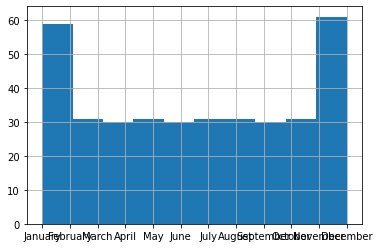

In [81]:
for col in df.columns:
    df[col].hist()
    plt.show()

In [82]:
# Z scores

In [84]:
temp_z = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()
rain_z = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()
flyers_z = (df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()
sales_z = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

In [85]:
# Adding columns based on z scores
df['temp_z'] = temp_z
df['rain_z'] = rain_z
df['flyers_z'] = flyers_z
df['sales_z'] = sales_z

In [86]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488,-1.820927,-0.577281
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,-1.787286,1.840253,-1.820927,-0.480344
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,-1.477652,1.840253,-0.950507,-0.415720
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,-0.946852,0.817946,-0.877972,-0.351096
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,-1.040848,0.635391,-0.515297,-0.318783


In [87]:
df[df['temp_z'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227,-0.221847
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251,-1.299691,2.676244,0.424395
2017-06-26,Monday,102.6,0.47,60,0.5,42,June,2.287714,-1.299691,1.443149,0.456708
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2.304301,-1.299691,1.370614,3.720233
2017-07-10,Monday,98.0,0.49,66,0.5,40,July,2.033372,-1.226669,1.878359,0.392083
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251,-1.299691,2.603709,0.424395
2017-07-22,Saturday,99.6,0.47,49,0.5,42,July,2.121838,-1.299691,0.645264,0.456708
2017-07-27,Thursday,97.9,0.47,74,0.5,43,July,2.027843,-1.299691,2.458639,0.489020
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,-2.168799,3.629291,-2.111067,-0.577281


In [88]:
df[df['rain_z'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488,-1.820927,-0.577281
2017-01-06,Friday,25.3,1.54,23,0.5,11,January,-1.986336,2.606983,-1.240647,-0.544968
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January,-1.566119,2.606983,-1.530787,-0.480344
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January,-1.582706,2.606983,-1.240647,-0.512656
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,-1.693290,3.081626,-1.168112,-0.512656
2017-01-17,Tuesday,32.2,1.43,26,0.5,14,January,-1.604823,2.205363,-1.023042,-0.448032
2017-01-20,Friday,31.6,1.43,20,0.5,12,January,-1.637998,2.205363,-1.458252,-0.512656
2017-01-24,Tuesday,28.6,1.54,20,0.5,12,January,-1.803873,2.606983,-1.458252,-0.512656
2017-12-04,Monday,34.9,1.54,16,0.5,13,December,-1.455535,2.606983,-1.748392,-0.480344


In [89]:
df[df['flyers_z'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.105251,-1.299691,2.676244,0.424395
2017-06-20,Tuesday,85.1,0.54,70,0.5,37,June,1.320109,-1.044114,2.168499,0.295147
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,1.828792,-1.299691,2.603709,0.424395
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,1.779030,-1.153647,2.023429,4.204914
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,1.121058,-1.044114,2.023429,6.692948
2017-07-14,Friday,92.0,0.50,80,0.5,40,July,1.701621,-1.190158,2.893849,0.392083
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.105251,-1.299691,2.603709,0.424395
2017-07-23,Sunday,89.1,0.51,72,0.5,37,July,1.541275,-1.153647,2.313569,0.295147
2017-07-24,Monday,83.5,0.57,69,0.5,35,July,1.231642,-0.934581,2.095964,0.230523


In [90]:
df[df['sales_z'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2.304301,-1.299691,1.370614,3.720233
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,1.779030,-1.153647,2.023429,4.204914
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,1.121058,-1.044114,2.023429,6.692948
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July,1.270346,-0.861559,0.645264,16.354275


In [91]:
# Testing for Sigma of 3

In [92]:
df[df['temp_z'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227,-0.221847


In [94]:
df[df['rain_z'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-1.892340,4.286488,-1.820927,-0.577281
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,-1.693290,3.081626,-1.168112,-0.512656
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,-2.168799,3.629291,-2.111067,-0.577281
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,-1.654586,3.629291,-1.820927,-0.544968
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,-2.550311,6.112037,-2.256137,-0.674217


In [95]:
df[df['flyers_z'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,-0.786506,0.452836,-5.665283,-0.254159


In [96]:
df[df['sales_z'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,temp_z,rain_z,flyers_z,sales_z
Date,,,,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July,2.304301,-1.299691,1.370614,3.720233
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July,1.779030,-1.153647,2.023429,4.204914
2017-07-03,Monday,81.5,0.54,68,0.5,235,July,1.121058,-1.044114,2.023429,6.692948
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July,1.270346,-0.861559,0.645264,16.354275


In [97]:
# Even with just the 2nd Sigma there are a number of data points that are obvious outliers and would (should) be 
# removed if further analysis is to be done, if we want the assumption/int of the data being normally distributed. 